# Road Accident Severity Prediction India 

![maxresdefault.jpg](attachment:7a45a01f-66a2-4cbd-bc3b-18b402df4e8c.jpg)

# Project Objective: 

This project analyzes road accident data in India to predict accident severity—slight, serious, or fatal—using features such as driver demographics, vehicle type, road conditions, and environmental factors. Accurate prediction can help authorities identify high-risk scenarios, improve road safety measures, and reduce casualties across the country

# Step-1: Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
print('All modules Loaded Successfully')

All modules Loaded Successfully


# Step-2: Load Data / Create DF 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("s3programmer/road-accident-severity-in-india")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Aaryan Bhardwaj\.cache\kagglehub\datasets\s3programmer\road-accident-severity-in-india\versions\1


In [3]:
os.listdir(path)

['Road.csv']

In [4]:
file_path = path + '/' + os.listdir(path)[0]
df = pd.read_csv(file_path)
print('Done')

Done


In [5]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


# Step-3: EDA

In [6]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [7]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [8]:
r,c = df.shape
print(f'''Dataset Contains:
Rows: {r}
Coloumns: {c}''')

Dataset Contains:
Rows: 12316
Coloumns: 32


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
df.isna().sum().sort_values(ascending=False)

Defect_of_vehicle              4427
Service_year_of_vehicle        3928
Work_of_casuality              3198
Fitness_of_casuality           2635
Type_of_vehicle                 950
Types_of_Junction               887
Driving_experience              829
Educational_level               741
Vehicle_driver_relation         579
Owner_of_vehicle                482
Lanes_or_Medians                385
Vehicle_movement                308
Area_accident_occured           239
Road_surface_type               172
Type_of_collision               155
Road_allignment                 142
Sex_of_driver                     0
Age_band_of_driver                0
Day_of_week                       0
Time                              0
Weather_conditions                0
Number_of_vehicles_involved       0
Light_conditions                  0
Road_surface_conditions           0
Casualty_class                    0
Number_of_casualties              0
Age_band_of_casualty              0
Sex_of_casualty             

<Axes: >

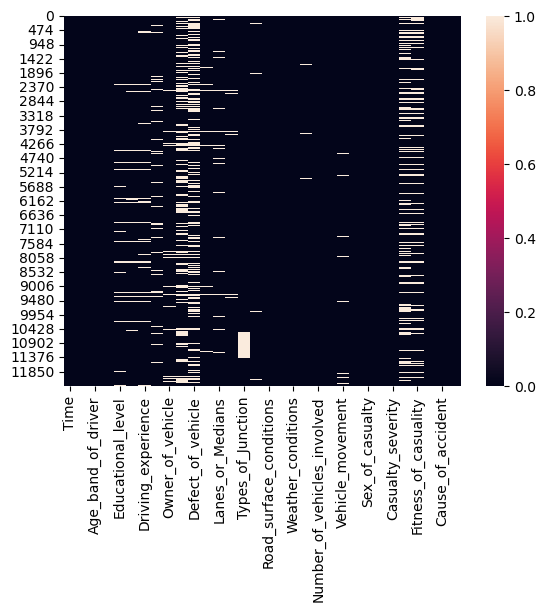

In [11]:
sns.heatmap(df.isnull())

In [19]:
df['Age_band_of_casualty'].unique()

array(['na', '31-50', '18-30', 'Under 18', 'Over 51', '5'], dtype=object)

In [12]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

**Defect of Vehicle Codes:**

- 1 → No defect
- 2 → Brake failure
- 3 → Tyre burst
- 4 → Steering failure
- 5 → Headlight / lighting defect (poor visibility due to faulty lights)
- 6 → Overloading / load-related defect
- 7 → Other mechanical defect
- 9 → Not known

In [13]:
df['Defect_of_vehicle'].fillna(9, inplace=True)
print('Done')
# filling the Nan Values with the number 9

Done


In [14]:
df['Defect_of_vehicle'].replace({"No defect": 1}, inplace=True)
print('Nan values of Defect_of_vehicle are treated..!!!')
# Here we have replaced the row-value: No Defects with 1

Nan values of Defect_of_vehicle are treated..!!!


In [20]:
df['Work_of_casuality'].fillna('Unknown', inplace=True)
df['Fitness_of_casuality'].fillna('Unknown', inplace=True)
df['Types_of_Junction'].fillna('Unknown', inplace = True)
df['Educational_level'].fillna('Unknown', inplace = True)
df['Vehicle_driver_relation'].fillna('Unkown', inplace = True)
df['Road_allignment'].fillna('Unknown',inplace = True)
df['Road_surface_type'].fillna('Unknown',inplace = True)
df['Type_of_collision'].fillna('Unknown',inplace = True)
df['Type_of_vehicle'].fillna('Unkown', inplace = True)
df['Service_year_of_vehicle'].fillna('Unknown', inplace = True)
df['Driving_experience'].fillna('Unkown', inplace = True)
df['Owner_of_vehicle'].fillna('Unkown', inplace = True)
df['Vehicle_movement'].fillna('Unknown',inplace = True)  
df['Lanes_or_Medians'].fillna('Unknown',inplace = True)
df['Area_accident_occured'].fillna('Unknown',inplace = True)


print('''Nan Values of the following are treated successfully..!!! : 
1. Types_of_Junction
2. Vehicle_driver_relation 
3. Educational_level
4. Road_allignment
5. Road_surface_type
6. Type_of_collision
7. Work_of_casuality
8. Fitness_of_casuality
9. Type_of_vehicle
10. Service_year_of_vehicle
11. Driving_experience
12. Owner_of_vehicle
13. Vehicle_movement
14. Lanes_or_Medians
15. Area_accident_occured
''')

Nan Values of the following are treated successfully..!!! : 
1. Types_of_Junction
2. Vehicle_driver_relation 
3. Educational_level
4. Road_allignment
5. Road_surface_type
6. Type_of_collision
7. Work_of_casuality
8. Fitness_of_casuality
9. Type_of_vehicle
10. Service_year_of_vehicle
11. Driving_experience
12. Owner_of_vehicle
13. Vehicle_movement
14. Lanes_or_Medians
15. Area_accident_occured



In [ ]:
# upar. Defect_of_vehicle              4427
# 10. Service_year_of_vehicle        3928
# 7. Work_of_casuality              3198
# 8. Fitness_of_casuality           2635
# 9. Type_of_vehicle                 950
# 1. Types_of_Junction               887
# 11. Driving_experience              829
# 3. Educational_level               741
# 2. Vehicle_driver_relation         579
# 12. Owner_of_vehicle                482
# 14. Lanes_or_Medians                385
# 13. Vehicle_movement                308
# 15. Area_accident_occured           239
# 5. Road_surface_type               172
# 6. Type_of_collision               155
# 4. Road_allignment                 142

### Our df contains 'na' as values which are again just like NAN so we need to treat them by :
- 1. Replacing them with Nan
- 2. And then treating them just like Nan

In [21]:
df.replace("na", np.nan, inplace=True)

<Axes: >

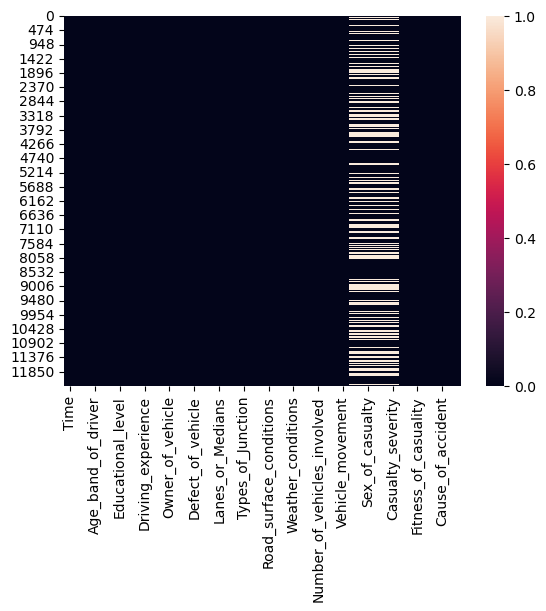

In [22]:
sns.heatmap(df.isnull())

In [23]:
df['Sex_of_casualty'].fillna('Unknown', inplace = True)
df['Age_band_of_casualty'].fillna('Unknown', inplace = True)
df['Casualty_class'].fillna('Unknown', inplace = True)
print(''' Na values which were converted to Nan if the following columns has now been treated: 
16. Sex_of_casualty
17. Age_band_of_casualty
18. Casualty_class''')

 Na values which were converted to Nan if the following columns has now been treated: 
16. Sex_of_casualty
17. Age_band_of_casualty
18. Casualty_class


<Axes: >

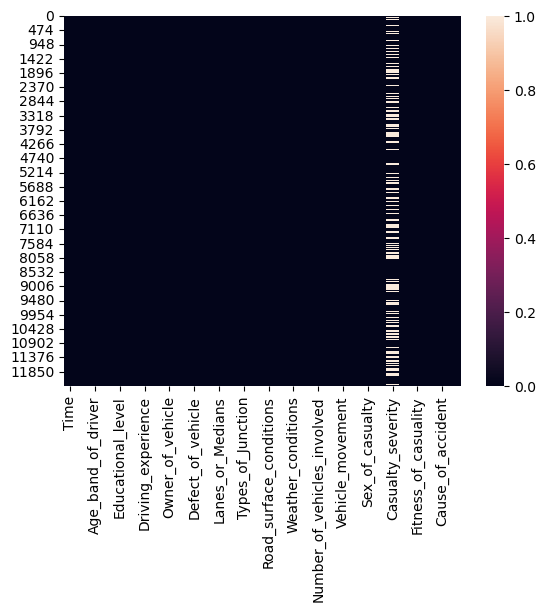

In [24]:
sns.heatmap(df.isnull())

In [25]:
df = df.dropna(subset=["Casualty_severity"])

<Axes: >

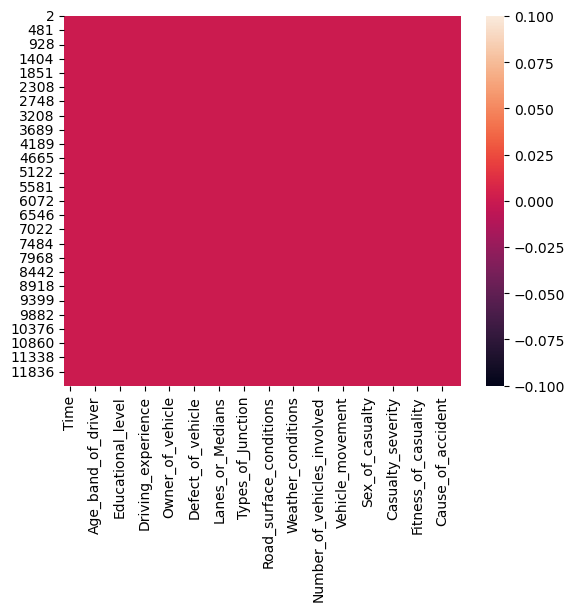

In [26]:
sns.heatmap(df.isnull())

In [28]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [30]:
df[['Type_of_vehicle', 'Age_band_of_driver', 'Driving_experience',
        'Weather_conditions', 'Light_conditions', 'Type_of_collision']]

,Type_of_vehicle,Age_band_of_driver,Driving_experience,Weather_conditions,Light_conditions,Type_of_collision
2,Lorry (41?100Q),18-30,1-2yr,Normal,Daylight,Collision with roadside objects
3,Public (> 45 seats),18-30,5-10yr,Normal,Darkness - lights lit,Vehicle with vehicle collision
5,Unkown,31-50,Unkown,Normal,Daylight,Vehicle with vehicle collision
6,Automobile,18-30,2-5yr,Normal,Daylight,Vehicle with vehicle collision
8,Lorry (41?100Q),18-30,Above 10yr,Normal,Daylight,Collision with roadside-parked vehicles
...,...,...,...,...,...,...
12305,Public (> 45 seats),18-30,2-5yr,Normal,Daylight,Vehicle with vehicle collision
12309,Pick up upto 10Q,31-50,5-10yr,Normal,Darkness - lights lit,Collision with roadside objects
12310,Special vehicle,18-30,Unkown,Normal,Daylight,Vehicle with vehicle collision
12313,Bajaj,Over 51,5-10yr,Normal,Daylight,Vehicle with vehicle collision


### At this point onward we will only deal with the following columns :
#### For input :  
1.  Type_of_vehicle
2.  Age_band_of_driver
3.  Driving_experience
4.  Weather_conditions
5.  Light_conditions
6.  Type_of_collision

#### For Target column: 
1. Casualty_severity

##### Note: WE WILL APPLY ORDINAL CODING TO THESE COLUMNS BECAUSE OF THEIR VALUES 

# Step-4: Preprocessing all columns 

In [31]:
# Ordinal encoding for Type_of_vehicle
vehicle_order = ['Cycle', 'Motorbike', 'Car', 'Van', 'Truck', 'Bus', 'Other']
df['Type_of_vehicle'] = df['Type_of_vehicle'].map({k: i for i, k in enumerate(vehicle_order)})

# Check the first 5 values
df[['Type_of_vehicle']].head()


,Type_of_vehicle
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN


In [33]:
# Ordinal encoding for Driving_experience
exp_order = ['<1 year', '1-3 years', '3-5 years', '5+ years']
df['Driving_experience'] = df['Driving_experience'].map({k: i for i, k in enumerate(exp_order)})

df[['Driving_experience']].head()


,Driving_experience
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN


In [32]:
# Ordinal encoding for Age_band_of_driver
age_order = ['<18', '18-25', '26-35', '36-45', '46-55', '56+']
df['Age_band_of_driver'] = df['Age_band_of_driver'].map({k: i for i, k in enumerate(age_order)})

df[['Age_band_of_driver']].head()


,Age_band_of_driver
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN


In [34]:
# Ordinal encoding for Weather_conditions
weather_order = ['Clear', 'Rain', 'Fog', 'Snow', 'Other']
df['Weather_conditions'] = df['Weather_conditions'].map({k: i for i, k in enumerate(weather_order)})

df[['Weather_conditions']].head()


,Weather_conditions
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN


In [35]:
# Ordinal encoding for Light_conditions
light_order = ['Daylight', 'Darkness - lights lit', 'Darkness - lights unlit', 'Other']
df['Light_conditions'] = df['Light_conditions'].map({k: i for i, k in enumerate(light_order)})

df[['Light_conditions']].head()


,Light_conditions
2,0.0
3,1.0
5,0.0
6,0.0
8,0.0


In [36]:
# Ordinal encoding for Type_of_collision
collision_order = ['Rear-end', 'Side', 'Head-on', 'Other']
df['Type_of_collision'] = df['Type_of_collision'].map({k: i for i, k in enumerate(collision_order)})

df[['Type_of_collision']].head()


,Type_of_collision
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN


In [37]:
# Ordinal encoding for target: Casualty_severity
severity_order = ['Slight', 'Serious', 'Fatal']
df['Casualty_severity'] = df['Casualty_severity'].map({k: i for i, k in enumerate(severity_order)})

df[['Casualty_severity']].head()


,Casualty_severity
2,NaN
3,NaN
5,NaN
6,NaN
8,NaN


<Axes: >

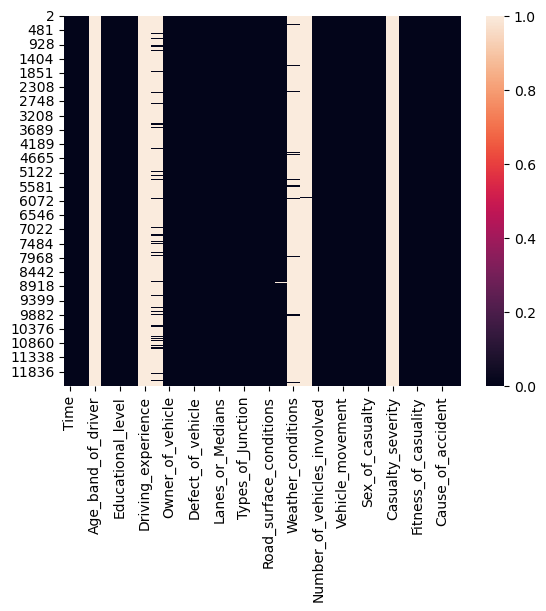

In [38]:
sns.heatmap(df.isnull())

In [88]:
df.replace('Unknown',10)
print('Done')

Done


In [189]:
# ---------------- 1️⃣ Separate classes ----------------
df_slight = df[df['Accident_severity'] == 0]
df_serious = df[df['Accident_severity'] == 1]
df_fatal = df[df['Accident_severity'] == 2]

# ---------------- 2️⃣ Undersample Fatal ----------------
# Make the number of Fatal samples equal to the number of Serious samples
df_fatal_sampled = df_fatal.sample(n=len(df_serious), random_state=42)

# ---------------- 3️⃣ Combine all classes ----------------
df_balanced = pd.concat([df_slight, df_serious, df_fatal_sampled])

# ---------------- 4️⃣ Shuffle the dataset ----------------
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# ---------------- 5️⃣ Check new class distribution ----------------
print(df_balanced['Accident_severity'].value_counts())


Series([], Name: count, dtype: int64)


In [190]:
ordinal_cols = ['Type_of_vehicle', 'Age_band_of_driver', 'Driving_experience', 
                'Weather_conditions', 'Light_conditions', 'Type_of_collision']

# Step 1: Strip whitespace and make all strings consistent
for col in ordinal_cols:
    df[col] = df[col].astype(str).str.strip().str.capitalize()

# Step 2: Replace all variants of 'Unknown' with 10
df[ordinal_cols] = df[ordinal_cols].replace({'Unknown': 10, 'unknown': 10})

# Step 3: Convert everything to numeric
df[ordinal_cols] = df[ordinal_cols].apply(pd.to_numeric, errors='coerce')

# Step 4: Check if any non-numeric values remain
print(df[ordinal_cols].isna().sum())





Type_of_vehicle       0
Age_band_of_driver    0
Driving_experience    0
Weather_conditions    0
Light_conditions      0
Type_of_collision     0
dtype: int64


In [191]:
# -----------------------------
# 2️⃣ Clean target variable
# -----------------------------
# Convert to string, strip spaces, capitalize
df['Accident_severity'] = df['Accident_severity'].astype(str).str.strip().str.capitalize()

# Remove rows where target is 'Unknown'
df = df[df['Accident_severity'] != 'Unknown']
print('Done')

Done


In [192]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Your ordinal input columns
ordinal_cols = ['Type_of_vehicle', 'Age_band_of_driver', 'Driving_experience', 
                'Weather_conditions', 'Light_conditions', 'Type_of_collision']

# -----------------------------
# 1️⃣ Clean input features
# -----------------------------
for col in ordinal_cols:
    # Convert to string, strip spaces, capitalize
    df[col] = df[col].astype(str).str.strip().str.capitalize()
    # Replace 'Unknown' with a numeric placeholder
    df[col] = df[col].replace({'Unknown': 10})
    # Convert to numeric
    df[col] = pd.to_numeric(df[col], errors='coerce')

# -----------------------------
# 2️⃣ Drop rows with missing input features
# -----------------------------
df = df.dropna(subset=ordinal_cols)

# -----------------------------
# 3️⃣ Prepare target variable
# -----------------------------
# Already numeric: 0, 1, 2


<Axes: >

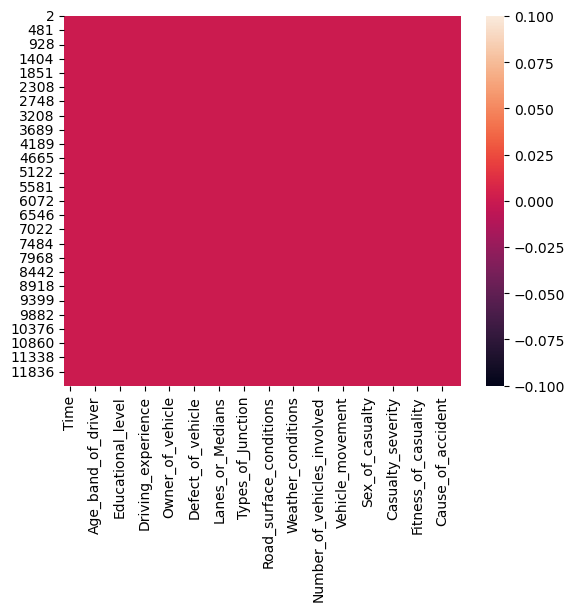

In [193]:
sns.heatmap(df.isnull())

In [194]:
X = df[ordinal_cols]
y = df['Accident_severity']
print('Done')

Done


In [195]:
print(X.shape)
print(y.shape)

(7873, 6)
(7873,)


# Step-5: Dividing Data into Train Test Split

In [196]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Done')

Done


In [197]:
print('Shape of X-train: ',X_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of y_test: ',y_test.shape)

Shape of X-train:  (6298, 6)
Shape of X_test:  (1575, 6)
Shape of y_train:  (6298,)
Shape of y_test:  (1575,)


# Step-6: Multi-Model Creation

### Step- 5.1: Logisitc Regression Model

In [198]:
df.replace('Unknown',10)
print('Done')

Done


In [199]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()     #Model Object

model_lr.fit(X_train,y_train)   # Training/Model Building 

LogisticRegression()

In [200]:
y_pred = model_lr.predict(X_test)

In [201]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [202]:
lr_score = accuracy_score(y_test,y_pred)
lr_score

0.8507936507936508

In [203]:
cm = confusion_matrix(y_test,y_pred)

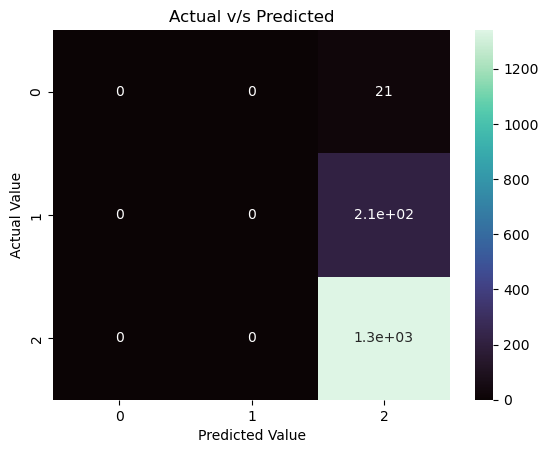

In [204]:
plt.title('Actual v/s Predicted')
sns.heatmap(cm, annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00       214
           2       0.85      1.00      0.92      1340

    accuracy                           0.85      1575
   macro avg       0.28      0.33      0.31      1575
weighted avg       0.72      0.85      0.78      1575



### Step-5.2: NaiveBayes ML Model

In [206]:
from sklearn.naive_bayes import GaussianNB

model_nv = GaussianNB()

model_nv.fit(X_train,y_train)

GaussianNB()

In [207]:
y_pred = model_nv.predict(X_test)

In [208]:
nv_score = model_nv.score(X_test,y_test)
print('Naive Bayes Score: ',nv_score)

Naive Bayes Score:  0.03492063492063492


In [209]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred, average='weighted'))
print('Recall Score: ',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score: ',f1_score(y_test,y_pred, average='weighted'))

Accuracy Score:  0.03492063492063492
Precision Score:  0.7233576097105509
Recall Score:  0.03492063492063492
F1 Score:  0.04228422278376025


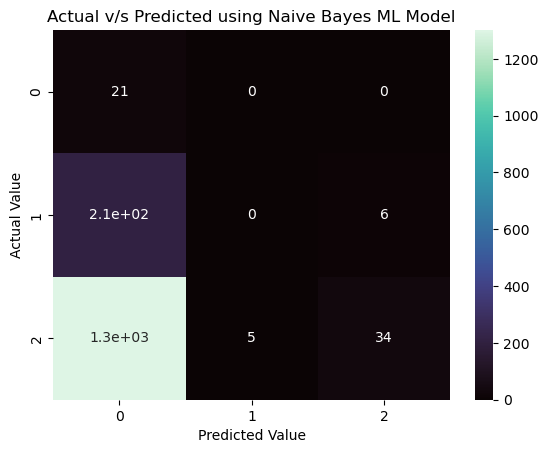

In [210]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [211]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.01      1.00      0.03        21
           1       0.00      0.00      0.00       214
           2       0.85      0.03      0.05      1340

    accuracy                           0.03      1575
   macro avg       0.29      0.34      0.03      1575
weighted avg       0.72      0.03      0.04      1575



### Step- 5.3: Vector VL Model

In [212]:
from sklearn.svm import SVC

model_svc = SVC()

model_svc.fit(X_train,y_train)

SVC()

In [213]:
y_pred = model_svc.predict(X_test)

In [214]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred, average='weighted'))
print('Recall Score: ',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score: ',f1_score(y_test,y_pred, average='weighted'))

Accuracy Score:  0.8507936507936508
Precision Score:  0.7238498362307886
Recall Score:  0.8507936507936508
F1 Score:  0.782204797299137


In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00       214
           2       0.85      1.00      0.92      1340

    accuracy                           0.85      1575
   macro avg       0.28      0.33      0.31      1575
weighted avg       0.72      0.85      0.78      1575



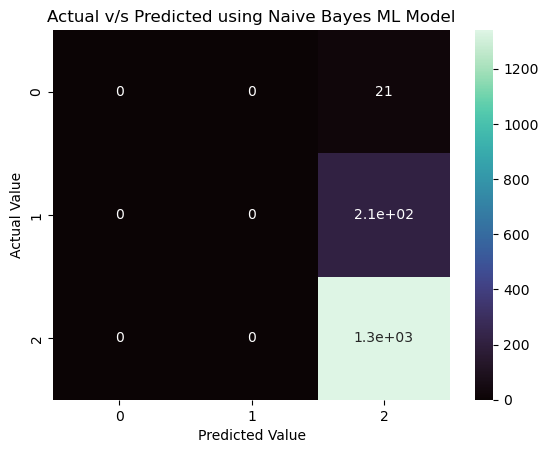

In [216]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted using Naive Bayes ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [217]:
svm_score = accuracy_score(y_test,y_pred)

In [218]:
lr_score,nv_score,svm_score

(0.8507936507936508, 0.03492063492063492, 0.8507936507936508)

In [219]:
model_svc.score(X_test,y_test)

0.8507936507936508

### Step- 5.4: Decision Tree ML Model 

In [220]:
from sklearn.tree import DecisionTreeClassifier

In [221]:
model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [222]:
y_pred = model_dt.predict(X_test)

In [223]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred, average='weighted'))
print('Recall Score: ',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score: ',f1_score(y_test,y_pred, average='weighted'))

Accuracy Score:  0.8495238095238096
Precision Score:  0.7236884327793418
Recall Score:  0.8495238095238096
F1 Score:  0.7815735700390695


In [224]:
dt_score = accuracy_score(y_test,y_pred)
dt_score

0.8495238095238096

In [225]:
from sklearn.tree import plot_tree

### Step- 5.5: KNN Model

In [226]:
from sklearn.neighbors import KNeighborsClassifier

In [227]:
model_knn = KNeighborsClassifier(n_neighbors = 14) # k = 14

model_knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=14)

In [228]:
y_pred = model_knn.predict(X_test)

In [229]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00       214
           2       0.85      1.00      0.92      1340

    accuracy                           0.85      1575
   macro avg       0.28      0.33      0.31      1575
weighted avg       0.72      0.85      0.78      1575



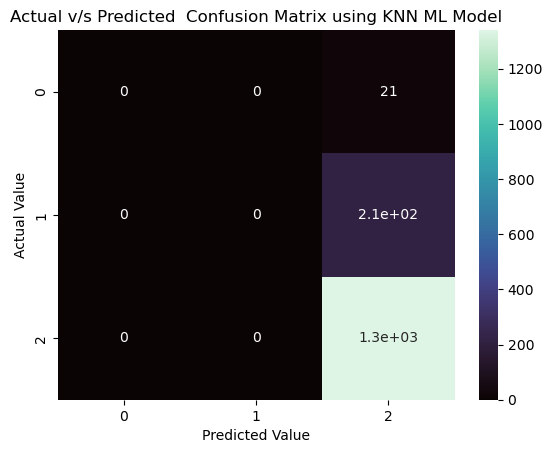

In [230]:
cm = confusion_matrix(y_test,y_pred)

plt.title('Actual v/s Predicted  Confusion Matrix using KNN ML Model')
sns.heatmap(cm,annot = True, cmap = 'mako')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
plt.show()

In [231]:
knn_score = accuracy_score(y_test,y_pred)

In [232]:
all_model_score = [lr_score,nv_score,svm_score,dt_score,knn_score,rf_score]
model_name = ['Logistic','Naive','SVM','Decision Tree','KNN','Random Forest']
# print(len(all_model_score))
print('Done')

Done


In [233]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(n_estimators = 200) # Parameter change from default(100) to 200

model_rf.fit(X_train,y_train)  # Learning part 

RandomForestClassifier(n_estimators=200)

In [234]:
y_pred = model_rf.predict(X_test)

In [235]:
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Precision Score: ',precision_score(y_test,y_pred, average='weighted'))
print('Recall Score: ',recall_score(y_test,y_pred, average='weighted'))
print('F1 Score: ',f1_score(y_test,y_pred, average='weighted'))

Accuracy Score:  0.8495238095238096
Precision Score:  0.7236884327793418
Recall Score:  0.8495238095238096
F1 Score:  0.7815735700390695


In [236]:
rf_score = accuracy_score(y_test,y_pred)
rf_score

0.8495238095238096

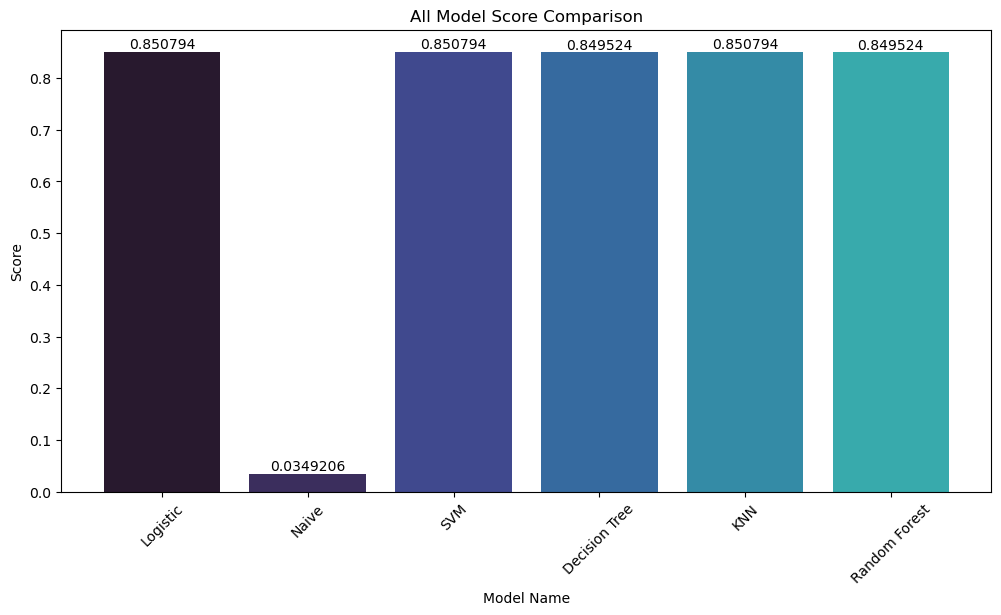

In [237]:
plt.figure(figsize=(12,6))
plt.title('All Model Score Comparison')
ax = plt.bar(x = model_name, height= all_model_score,color = sns.color_palette('mako',8))
plt.bar_label(ax)
plt.xlabel('Model Name')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.savefig("model_scores.jpg", dpi=300, bbox_inches='tight')
plt.show()

# Step-7: Best Model Save 

In [238]:
import pickle
with open('road_accident_severity_pred.pkl','wb') as f:
    pickle.dump(model_lr,f)
print('Done')

Done


In [239]:
os.getcwd()

'C:\\Users\\Aaryan Bhardwaj\\Minor project(Main)'

In [240]:
df['Accident_severity'].unique()

array(['1', '2', '0'], dtype=object)